<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [159]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [160]:
# 데이터 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [161]:
# 기술통계 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [162]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]


**2) 가변수화**

In [163]:
# 가변수화 대상: sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, columns = dumm_cols, drop_first=True)

# 확인

x.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 학습용, 평가용 데이터 분리**

In [164]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

**4) 정규화**

In [165]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s =  scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# pip install xgboost

In [ ]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [167]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from xgboost import XGBRFRegressor
from sklearn.metrics import *









**1) Linear Regression**

- Linear Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [168]:
# 선언하기
model = LinearRegression()

In [169]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'r2')

In [170]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.68733129 0.72630945 0.82457396 0.73764922 0.71314841 0.75100487
 0.71858438 0.69926087 0.78120491 0.81257551]
평균: 0.7451642881870868
표준편차: 0.04447299873086411


In [201]:
# 결과수집
result = {}
result['Linear Regression'] = cv_score.mean()


**2) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [202]:
# 선언하기
model = KNeighborsRegressor(n_neighbors=5)

In [203]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv = 10, scoring = 'r2')

In [204]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.69551237 0.69648785 0.77699225 0.72284561 0.69937007 0.70712044
 0.70168701 0.7121731  0.78219423 0.76965699]
평균: 0.7264039919817701
표준편차: 0.03364611360247315


In [205]:
# 결과수집
result['KNN'] = cv_score.mean()

**3) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [206]:
# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state = 1)

In [207]:
# 성능예측
cv_score = cross_val_score(model, x_train_s, y_train, cv = 10, scoring = 'r2')

In [208]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.81520046 0.81862314 0.90356047 0.80507168 0.7022564  0.82593674
 0.81342897 0.78391338 0.85393447 0.91948368]
평균: 0.8241409389432128
표준편차: 0.05775070398273776


In [209]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

**4) SVM**

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [210]:
# 선언하기
model = SVR(kernel = 'linear', C = 30)

In [211]:
cv_score = cross_val_score(model, x_train_s, y_train, cv = 10, scoring = 'r2')

In [212]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.11022364 0.21667424 0.28217827 0.17037269 0.16821472 0.1662085
 0.17590369 0.20741646 0.18981292 0.23748038]
평균: 0.19244855050055276
표준편차: 0.044379033440815424


In [213]:
# 결과수집
result['SVM'] = cv_score.mean()

**5) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [214]:
# 선언하기
model = RandomForestRegressor(random_state = 1)

In [215]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'r2')

In [216]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.78929523 0.80524821 0.90298504 0.81309176 0.7851149  0.86228023
 0.79644775 0.78389699 0.87115785 0.8852697 ]
평균: 0.8294787674600419
표준편차: 0.043515688509170536


In [217]:
# 결과수집
result['Random Forest'] = cv_score.mean()

**6) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [218]:
# 선언하기
model = XGBRFRegressor(max_depth = 3, random_state = 1)

In [219]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'r2')

In [220]:
# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.81107818 0.83577863 0.90296786 0.83963642 0.81304405 0.85212171
 0.8514817  0.77521849 0.87417608 0.91664877]
평균: 0.8472151870890838
표준편차: 0.040674139388595695


In [221]:
# 결과수집
result['XGBoost'] = cv_score.mean()

**7) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [222]:
# 선언하기
model = LGBMRegressor(random_state = 1)

In [223]:
# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'r2')

In [224]:
# 결과확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())


[0.74534728 0.81490171 0.92152347 0.83986098 0.79756831 0.84300379
 0.81038971 0.75716671 0.86711055 0.89337167]
평균: 0.8290244192465062
표준편차: 0.05306753841675469


In [225]:
# 결과수집
result['LightGBM'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [226]:
import this

In [227]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, ':', score.round(3))
print('=' * 40)

Linear Regression : 0.829
KNN : 0.726
Decision Tree : 0.824
SVM : 0.192
Random Forest : 0.829
XGBoost : 0.847
LightGBM : 0.829


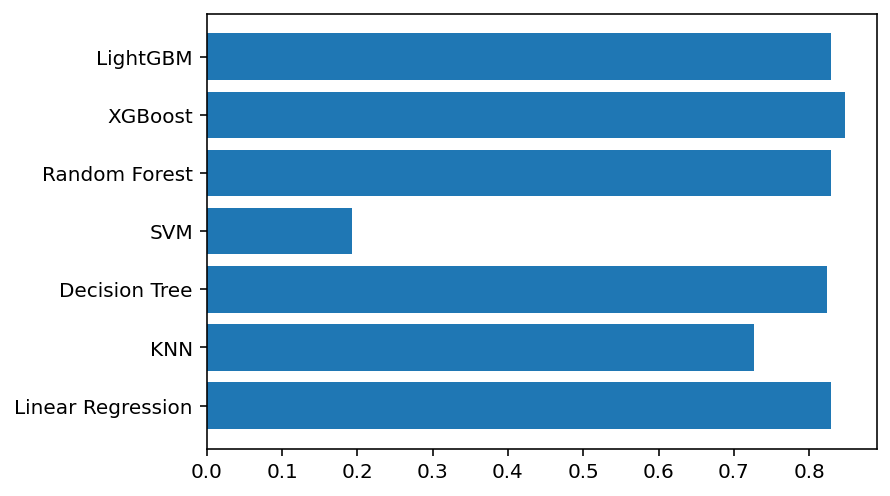

In [228]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 Random Forest 모델 성능을 튜닝합니다.

In [229]:
# 기본 모델 선언
model_dt = RandomForestRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'max_depth': range(1,21)}

# 모델 선언
model = RandomizedSearchCV(model_dt,    #기본모델
                           param,       #파라미터 범위
                           cv = 5,      #k-fold CV의 폴더 개수
                           n_iter = 20, #랜덤하게 시도할 횟수
                           scoring = 'r2'
                           )




In [230]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': range(1, 21)},
                   scoring='r2')

In [231]:
# 최적 파라미터, 예측 최고 성능
print('=' * 80)
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)


--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 4}
--------------------------------------------------------------------------------
최고성능: 0.8517715700233925


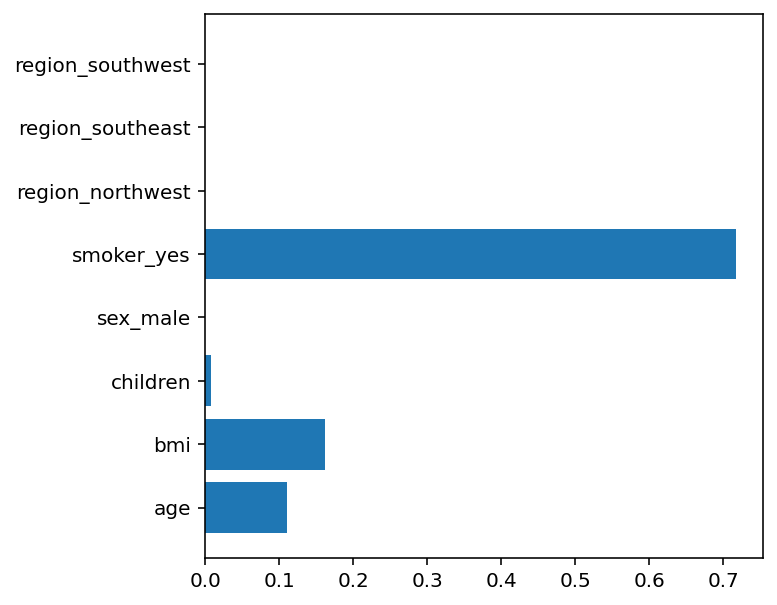

In [232]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()



# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [233]:
# 예측하기
y_pred = model.predict(x_test)

In [234]:
# 성능평가
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2515.2199877424073
0.8564958501461949
